# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.58'

In [2]:
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\Spectra'
spectra_path=DayFolder + '\Spectra'

## Load in specra, and combine

In [3]:
import os.path
from os import path
if path.exists('Discarded_df.xlsx'):
    discard=pd.read_excel('Discarded_df.xlsx')
else:
    discard=None
if path.exists('Weak_Diads.xlsx'):
    grp1=pd.read_excel('Weak_Diads.xlsx')
else:
    grp1=None
if path.exists('Medium_Diads.xlsx'):
    grp2=pd.read_excel('Medium_Diads.xlsx')
else:
    grp2=None
if path.exists('Strong_Diads.xlsx'):
    grp3=pd.read_excel('Strong_Diads.xlsx')
else:
    grp3=None
df2=pd.concat([grp1, grp2, grp3], axis=0)
if discard is not None:
    discard_cols=discard[discard.columns.intersection(df2.columns)]
    df2=pd.concat([df2, discard_cols])

In [4]:
df2.head()

,Unnamed: 0,filename,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,...,HB2_Sigma,C13_Cent,C13_Area,C13_Sigma,Diad2_Gauss_Cent,Diad2_Gauss_Area,Diad2_Gauss_Sigma,Diad1_Gauss_Cent,Diad1_Gauss_Area,Diad1_Gauss_Sigma
0,0,10mol_FIE_R3,102.860045,0.07410,0.054558,1285.961206,0.0263,941.650973,1285.961206,2649.209335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1mol_FIA_R1,102.759018,0.05460,0.042173,1286.323591,0.0393,2523.054688,1286.323591,5393.650108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1mol_FIA_R2,102.687955,0.02823,0.021315,1286.484421,0.0194,2137.380366,1286.484421,4842.994440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1mol_FIA_R3,102.733975,0.04350,0.031166,1286.544823,0.0253,1935.500011,1286.544823,4672.379791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1mol_FIB_R1,102.737469,0.03050,0.023099,1285.149925,0.0211,2027.954569,1285.149925,5115.279127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## First, get the metadata for this day

In [6]:
# Put the common string you can in all your Ne lines here
ID_str='_'
file_ext_meta='txt' # Will only take files of this type 
diad_meta=pf.get_files(path=meta_path,
file_ext='txt', exclude_str=['N', 'FG', 'Cap','window', 'CRR'],
 sort=True)
diad_meta

['10mol_FID_R1.txt',
 '10mol_FID_R2.txt',
 '10mol_FID_R3.txt',
 '10mol_FIE_R1.txt',
 '10mol_FIE_R2.txt',
 '10mol_FIE_R3.txt',
 '1mol_FIA_R1.txt',
 '1mol_FIA_R2.txt',
 '1mol_FIA_R3.txt',
 '1mol_FIB_R1.txt',
 '1mol_FIB_R2.txt',
 '1mol_FIB_R3.txt',
 '4mol_FID_R1.txt',
 '4mol_FID_R2.txt',
 '4mol_FID_R3.txt',
 'AutoCalibration - Laser 532.05 nm - Grating 1800 - Coeff 0.00429475  PASS-postcrash.txt',
 'LL8_404a_r1.txt',
 'LL8_404a_r2.txt',
 'LL8_404a_r3.txt',
 'LL8_612_a_r1.txt',
 'LL8_612_a_r2.txt',
 'LL8_612_a_r3.txt',
 'LL8_612_c_r1.txt',
 'LL8_612_c_r2.txt',
 'LL8_612_c_r3.txt',
 'LL8_615_r1.txt',
 'LL8_615_r2.txt',
 'LL8_615_r3.txt',
 'LL8_622B_R1.txt',
 'LL8_622B_R2.txt',
 'LL8_622B_R3.txt',
 'LL8_624_r1.txt',
 'LL8_624_r2.txt',
 'LL8_624_r3.txt',
 'LL8_626_MI_r1.txt',
 'LL8_626_MI_r2.txt',
 'LL8_626_MI_r3.txt',
 'LL8_631_a_r1.txt',
 'LL8_631_a_r2.txt',
 'LL8_631_a_r3.txt',
 'LL8_631_b_r1.txt',
 'LL8_631_b_r2.txt',
 'LL8_631_b_r3.txt']

## Now get all the important information out of the metadata files

In [7]:
meta=pf.loop_convert_datastamp_to_metadata(path=spectra_path, 
files=diad_meta, creation=False,
modification=True)
meta

,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,10mol_FIE_R1.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,1:46:39,6399,NaN
0,10mol_FIE_R2.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,1:49:45,6585,NaN
0,10mol_FIE_R3.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,1:53:30,6810,NaN
0,10mol_FID_R3.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,2:12:49,7969,NaN
0,1mol_FIB_R1.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,2:31:39,9099,NaN
0,1mol_FIB_R2.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,2:42:55,9775,NaN
0,1mol_FIB_R3.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,2:51:31,10291,NaN
0,10mol_FID_R1.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,2:5:15,7515,NaN
0,10mol_FID_R2.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,2:8:46,7726,NaN
0,1mol_FIA_R1.txt,"January 1, 2020",January,1,NaN,NaN,NaN,NaN,NaN,3:15:6,11706,NaN


## Then get a simple file name you can stitch with the spectra

In [8]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False, str_prefix=" ",
   file_type='.txt')
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'10mol_FIE_R1'

## Now get filename from spectra into same form as metadata

In [9]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    prefix=False, str_prefix=" ",
    names=df2['filename'].reset_index(drop=True),
   file_type='.txt')

good job, no duplicate file names


In [10]:
file_s

array(['10mol_FIE_R3', '1mol_FIA_R1', '1mol_FIA_R2', '1mol_FIA_R3',
       '1mol_FIB_R1', '1mol_FIB_R2', '1mol_FIB_R3', '4mol_FID_R1',
       '4mol_FID_R2', '4mol_FID_R3', 'LL8_404a_r1', 'LL8_404a_r2',
       'LL8_404a_r3', 'LL8_612_a_r1', 'LL8_612_a_r2', 'LL8_612_a_r3',
       'LL8_612_c_r1', 'LL8_612_c_r2', 'LL8_612_c_r3', 'LL8_615_r1',
       'LL8_615_r2', 'LL8_615_r3', 'LL8_622B_R1', 'LL8_622B_R2',
       'LL8_622B_R3', 'LL8_624_r1', 'LL8_624_r2', 'LL8_624_r3',
       'LL8_626_MI_r1', 'LL8_626_MI_r2', 'LL8_626_MI_r3', 'LL8_631_a_r1',
       'LL8_631_a_r2', 'LL8_631_a_r3', 'LL8_631_b_r1', 'LL8_631_b_r2',
       'LL8_631_b_r3', '10mol_FID_R1', '10mol_FID_R1_FIN', '10mol_FID_R2',
       '10mol_FID_R2_FIN', '10mol_FID_R3', '10mol_FID_R3_FIN',
       '10mol_FIE_R1', '10mol_FIE_R1_FIN', '10mol_FIE_R2',
       '10mol_FIE_R2_FIN', '10mol_FIE_R3_FIN'], dtype=object)

In [11]:
# Combining them together
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df2['Name_for_Secondary_Phases']=file_s
df_combo=df2.merge(meta, on='name_for_matching')

In [12]:
df_combo.head()

,Unnamed: 0,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,0,10mol_FIE_R3,102.860045,0.07410,0.054558,1285.961206,0.0263,941.650973,1285.961206,2649.209335,...,January,1,NaN,NaN,NaN,NaN,NaN,1:53:30,6810,NaN
1,0,1mol_FIA_R1,102.759018,0.05460,0.042173,1286.323591,0.0393,2523.054688,1286.323591,5393.650108,...,January,1,NaN,NaN,NaN,NaN,NaN,3:15:6,11706,NaN
2,0,1mol_FIA_R2,102.687955,0.02823,0.021315,1286.484421,0.0194,2137.380366,1286.484421,4842.994440,...,January,1,NaN,NaN,NaN,NaN,NaN,3:22:7,12127,NaN
3,0,1mol_FIA_R3,102.733975,0.04350,0.031166,1286.544823,0.0253,1935.500011,1286.544823,4672.379791,...,January,1,NaN,NaN,NaN,NaN,NaN,3:28:32,12512,NaN
4,0,1mol_FIB_R1,102.737469,0.03050,0.023099,1285.149925,0.0211,2027.954569,1285.149925,5115.279127,...,January,1,NaN,NaN,NaN,NaN,NaN,2:31:39,9099,NaN


In [13]:
Ne_corr=pf.calculate_Ne_corr_std_err_values(pickle_str='polyfit_data.pkl', 
    new_x=df_combo['sec since midnight'], N_poly=2, CI=0.67)
Ne_corr.head()

,time,preferred_values,lower_values,upper_values
0,6810,1.000310,1.000145,1.000476
1,11706,1.000352,1.000193,1.000511
2,12127,1.000355,1.000197,1.000514
3,12512,1.000358,1.000200,1.000517
4,9099,1.000330,1.000168,1.000492


In [75]:

split_err=pf.propagate_errors_for_splitting(Ne_corr, df_combo)
df_combo_out=df_combo.copy()
df_combo_out.insert(1, 'Corrected_Splitting', df_combo['Splitting']*Ne_corr['preferred_values'])
df_combo_out.insert(2, 'Corr_Split+1σ', df_combo_out['Corrected_Splitting']+split_err)
df_combo_out.insert(3, 'Corr_Split-1σ',df_combo_out['Corrected_Splitting']-split_err)
df_combo_out.insert(4, 'Corr_Split_1σ_val', split_err)


In [76]:
df_combo_out.to_excel('FI_fitting.xlsx')

## If you have secondary phases, now is the time to merge those in

In [77]:
if path.exists('Carb_Peak_fits.xlsx'):
    Carb=pd.read_excel('Carb_Peak_fits.xlsx')
else:
    Carb=None
if path.exists('SO2_Peak_fits.xlsx'):
    SO2=pd.read_excel('SO2_Peak_fits.xlsx')
else:
    SO2=None
if SO2 is not None and Carb is not None:
    Sec_Phases=pd.merge(SO2, Carb, on='filename', how='outer')
elif SO2 is not None and Carb is None:
    Sec_Phases=SO2
elif SO2 is None and Carb is not None:
    Sec_Phases=Carb
else:
    Sec_Phases=None


In [78]:
# Remove these to get the pure file name
if Sec_Phases is not None:
    file_sec_phase=pf.extracting_filenames_generic(
        prefix=False, str_prefix=" ",
        names=Sec_Phases['filename'].reset_index(drop=True),
       file_type='.txt')



In [79]:
df_combo['name_for_matching']=df_combo['Name_for_Secondary_Phases']

if Sec_Phases is not None:
    Sec_Phases['name_for_matching']=file_sec_phase
    df_combo_sec_phase=df_combo_out.merge(Sec_Phases, 
    on='name_for_matching', how='outer')
    
else:
    df_combo_sec_phase=df_combo_out

### Add some more useful columns

In [80]:
if 'Peak_Area_Carb' in df_combo_sec_phase.columns:
    df_combo_sec_phase['Carb_Diad_Ratio']=(df_combo_sec_phase['Peak_Area_Carb']/(df_combo_sec_phase['Diad1_Voigt_Area']
                      +df_combo_sec_phase['Diad2_Voigt_Area']))
if 'Peak_Area_SO2' in df_combo_sec_phase.columns:
    df_combo_sec_phase['SO2_Diad_Ratio']=(df_combo_sec_phase['Peak_Area_SO2']/(df_combo_sec_phase['Diad1_Voigt_Area']
                      +df_combo_sec_phase['Diad2_Voigt_Area']))

In [81]:
df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx')

In [82]:
# Lets load the standard data
std_data=pd.read_excel('VT_Densities.xlsx')
std_data_av= std_data.groupby('Match name', as_index=False).mean()
std_data_std= std_data.groupby('Match name', as_index=False).std()



In [83]:
df_combo_sec_phase['Match name'] = df_combo_sec_phase['filename_x'].str.replace('_R\d+', '', regex=True)
df_combo_sec_phase['Match name'].unique()

array(['10mol_FIE', '1mol_FIA', '1mol_FIB', '4mol_FID', 'LL8_404a_r1',
       'LL8_404a_r2', 'LL8_404a_r3', 'LL8_612_a_r1', 'LL8_612_a_r2',
       'LL8_612_a_r3', 'LL8_612_c_r1', 'LL8_612_c_r2', 'LL8_612_c_r3',
       'LL8_615_r1', 'LL8_615_r2', 'LL8_615_r3', 'LL8_622B', 'LL8_624_r1',
       'LL8_624_r2', 'LL8_624_r3', 'LL8_626_MI_r1', 'LL8_626_MI_r2',
       'LL8_626_MI_r3', 'LL8_631_a_r1', 'LL8_631_a_r2', 'LL8_631_a_r3',
       'LL8_631_b_r1', 'LL8_631_b_r2', 'LL8_631_b_r3', '10mol_FID'],
      dtype=object)

In [84]:
df_combo_sec_phase['filename_x'].unique()


array(['10mol_FIE_R3', '1mol_FIA_R1', '1mol_FIA_R2', '1mol_FIA_R3',
       '1mol_FIB_R1', '1mol_FIB_R2', '1mol_FIB_R3', '4mol_FID_R1',
       '4mol_FID_R2', '4mol_FID_R3', 'LL8_404a_r1', 'LL8_404a_r2',
       'LL8_404a_r3', 'LL8_612_a_r1', 'LL8_612_a_r2', 'LL8_612_a_r3',
       'LL8_612_c_r1', 'LL8_612_c_r2', 'LL8_612_c_r3', 'LL8_615_r1',
       'LL8_615_r2', 'LL8_615_r3', 'LL8_622B_R1', 'LL8_622B_R2',
       'LL8_622B_R3', 'LL8_624_r1', 'LL8_624_r2', 'LL8_624_r3',
       'LL8_626_MI_r1', 'LL8_626_MI_r2', 'LL8_626_MI_r3', 'LL8_631_a_r1',
       'LL8_631_a_r2', 'LL8_631_a_r3', 'LL8_631_b_r1', 'LL8_631_b_r2',
       'LL8_631_b_r3', '10mol_FID_R1', '10mol_FID_R2', '10mol_FID_R3',
       '10mol_FIE_R1', '10mol_FIE_R2'], dtype=object)

In [85]:

df_combo_sec_phase['Match name'] = df_combo_sec_phase['filename_x'].str.replace('_[Rr]\d+', '', regex=True)
df_combo_sec_phase['Match name'].head()

0    10mol_FIE
1     1mol_FIA
2     1mol_FIA
3     1mol_FIA
4     1mol_FIB
Name: Match name, dtype: object

In [86]:
cam_data_av= df_combo_sec_phase.groupby('Match name', as_index=False).mean()
cam_data_std= df_combo_sec_phase.groupby('Match name', as_index=False).std()

In [87]:
combined_df = pd.merge(cam_data_av, std_data_av, on='Match name')
combined_df_std = pd.merge(cam_data_std, std_data_std, on='Match name')

In [88]:
cam_data_av['Match name'].unique()

array(['10mol_FID', '10mol_FIE', '1mol_FIA', '1mol_FIB', '4mol_FID',
       'LL8_404a', 'LL8_612_a', 'LL8_612_c', 'LL8_615', 'LL8_622B',
       'LL8_624', 'LL8_626_MI', 'LL8_631_a', 'LL8_631_b'], dtype=object)

In [89]:
std_data_av['Match name'].unique()

array(['10mol_FIA', '10mol_FIB', '10mol_FIC', '10mol_FID', '10mol_FIE',
       '1mol_FIA', '1mol_FIB', '1mol_FIC', '1mol_FID', '1mol_FIE',
       '4mol_FIA', '4mol_FIB', '4mol_FIC', '4mol_FID', '4mol_FIE',
       'LL8_302', 'LL8_400', 'LL8_404a', 'LL8_404b'], dtype=object)

In [90]:
combined_df

,Match name,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,V-,Ne+,Ne-,∆,Ne ∆,Ne (mea) - ∆(Real),∆ Real,∆ (average),"r (Lamadrid et al., 2017)",r (average)
0,10mol_FID,102.906216,102.951999,102.860433,0.045783,102.873453,0.055500,0.042079,1285.571762,0.028900,...,1285.443333,1458.820000,1031.523333,102.993333,427.296667,0.136667,102.960392,102.960392,0.130939,0.130939
1,10mol_FIE,102.919067,102.971531,102.866602,0.052465,102.887338,0.081100,0.060940,1285.758162,0.025967,...,1285.410000,1458.816667,1031.523333,102.986667,427.293333,0.133333,102.954531,102.954531,0.128858,0.128858
2,1mol_FIA,102.763474,102.799221,102.727728,0.035746,102.726983,0.042110,0.031551,1286.450945,0.028000,...,1286.113333,1458.873333,1031.573333,102.760000,427.300000,0.140000,102.726332,102.726332,0.047848,0.047848
3,1mol_FIB,102.814189,102.926871,102.701507,0.112682,102.779703,0.123033,0.110065,1285.837354,0.108000,...,1286.100000,1458.870000,1031.580000,102.746667,427.290000,0.130000,102.715407,102.715407,0.043969,0.043969
4,4mol_FID,102.911458,102.943215,102.879701,0.031757,102.872003,0.037333,0.027395,1286.304553,0.023167,...,1285.623333,1458.850000,1031.560000,102.860000,427.290000,0.130000,102.828706,102.828706,0.084190,0.084190
5,LL8_404a,102.738750,102.776005,102.701494,0.037256,102.700645,0.045833,0.033332,1286.755655,0.027633,...,1285.853333,1458.563333,1031.246667,102.716667,427.316667,0.156667,102.679008,102.679008,0.031048,0.031048


Text(0, 0.5, 'Split cm-1')

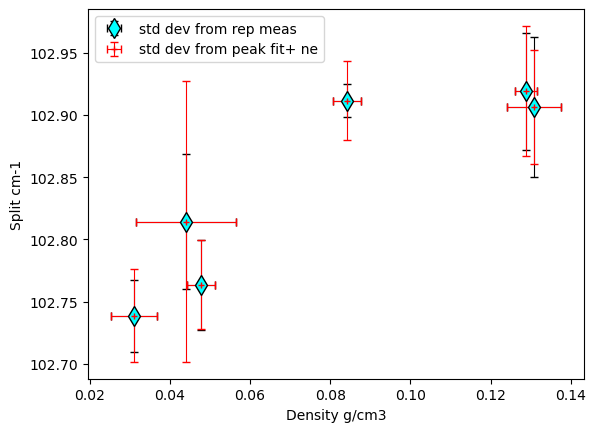

In [96]:
plt.plot( combined_df['r (Lamadrid et al., 2017)'], combined_df['Corrected_Splitting'],'ok')
plt.errorbar(combined_df['r (Lamadrid et al., 2017)'], combined_df['Corrected_Splitting'], 
             xerr=combined_df_std['r (Lamadrid et al., 2017)'], yerr=combined_df_std['Corrected_Splitting'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k', capsize=3, label='std dev from rep meas')

plt.errorbar(combined_df['r (Lamadrid et al., 2017)'], combined_df['Corrected_Splitting'], 
             xerr=combined_df_std['r (Lamadrid et al., 2017)'], yerr=combined_df['Corr_Split_1σ_val'],
             fmt='+', ecolor='red', elinewidth=0.8, mfc='cyan', ms=5, mec='r', capsize=3, label='std dev from peak fit+ ne')
plt.legend()
plt.xlabel('Density g/cm3')
plt.ylabel('Split cm-1')